<h1><center>Solving the Lights Out Puzzle Using Grover's Algorithm</center></h1>
<h3><center>Introduction to Quantum Computation and Quantum Information (CIE470) </center></h3>
<h2><center>Course Project (Phase 2)</center></h2>
<h3><center>Student: Muhammad Farouk El-Saeed</center></h3>
<h3><center>ID: 201700188</center></h3>


## Problem description: 
The Puzzle consists of an NxN grid of bulbs, where each bulb occupies a cell on the grid, and has its own switch, which when press switches the state of the bulb between "on <----> off" get flipped. The grid starts off in an initial state of on-&-off bulbs, and you need to find the sequence of switch presses that would "turn off all the lights", hence the name, "Lights-Out-Puzzle".  

Consider the initial state in the picture below, with yellow meaning the coresponding bulb is on, this is the setup we will have to solve for:

<img src="initial_state.png" style="width:200px;height:200px"/>

This corresponds to initial state :[0, 1, 1, 0, 0, 1, 1, 0, 0]

In [89]:
lights = [0, 1, 1, 0, 0, 1, 1, 0, 0] ## this is our variable holding the initial bulb states

On flipping a switch, the corresponding bulb and the ones surrounding it have their states flipped similar to the illustration below:

<img src="press_1.png" style="width:200px;height:200px"/>
<img src="press_2.png" style="width:200px;height:200px"/>
<img src="press_3.png" style="width:200px;height:200px"/>

Our goal is to find the sequence of switch flips, ex [000000111], that would turn off all the lights, with a grid looking like the one below:

<img src="lights_out.png" style="width:200px;height:200px"/>

## Steps:

#### A. Register Preparation: we need to setup the quantum and classical registers for the problem, which involves using 3 main quantum-registers and a classical-register.

1. A register to hold the solution space of switch-states, since the solution to the problem is a set of 9 on/off(binary system) switches (we have a 3x3 grid of bulbs), call this register "switch/var".
NB: remember a switch can be on or off (binary, and we can only flip a switch once), we therefore have $2^9$ possible states forming our state-space of possible solutions, a perfect candidate for mapping to a 9-qubit system.
2. A control register which will carry temporary info about the state of the bulbs (bulb-states), and be used to determine if a given switch-state is a solution, call it "bulb/ctrl"
3. An output qubit which will initiate a phase kickback if the control register (representing the bulb-states) reflects that a given switch-state is a solution.
4. A classical register to store the measurements.  

#### B. State initialization for our specific problem:
To initilaize the circuit to map to our specific initial state to the register.

#### C. Construct the problem Oracle:
To construct an oracle that would assign a negative phase to the solution state.  

#### D. Construct the Diffuser
 
#### E. Construct the Grover-Circuit over the appropriate number of iterations

#### F. Run the completed Grover-Circuit & Use the measurement to obtain the solution, which corresponds to the most probable state



## Solution: 

### IMPORTANT:   
#### You need to Place the appropriate code in front of the Question cells, please adjust your code so that it fits this framework, no other solution steps will be accepted, if you understood the first phase it should be very easy to follow this framework no matter how you approach the problem.

### A. Preparing registers before we initiate the states and apply an oracle and a Diffuser:

#### Hint: your register will need 19 Qubits

### Q1: Register preparation :

In [ ]:
!pip install qiskit
!pip install pylatexenc

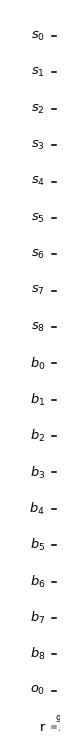

In [91]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import math
'''
Q1: Register preparation :
#first we choose a state to search for a solution to the lights out puzzel as a single value (all lights off), for example we're after
a solution which looks like this state 000000000.

#the number of qubits in use is 19 because we have 9 qubits for the number of the bulbs in the grid and another 9 for the solution space
plus one qubit for the phase qickback.
................................................................................................  

 construct the circuit "qc" given below by combining 4 inputs consisting of:
 3 quantum registers (switch, bulb, output) and a classical register (result) which returns an initial quantum circuit

'''
switch = QuantumRegister(9, name='s')

bulb = QuantumRegister(9, name='b')

output = QuantumRegister(1, name='o')

result = ClassicalRegister(9, name='r')

qc = QuantumCircuit(switch, bulb, output, result) ## a circuit combining all the registers
qr = QuantumCircuit(switch, bulb, output) ## a temporary variable in order to access our quantum registers
qc.draw(output="mpl",scale=0.8, vertical_compression="low")


### Iterations:

We can always approximate the number of iterations Grover's algorithm needs to reach a solution given the number of winners and the size of our solution state-space, here we have $2^9$ solutions, from which only one is the winner, so describe how many iterations we will need below:

### Q2: Iterations can be determined by :


Q2: Describe how we determine the number of iterations and set the number of iterations for our case:

it's 0.25 x π x sqaure root of(2^9) because we are searching for a single solution = 17 iterations

In [92]:
'''
Q2: set Iterations variable: 
'''
iterations = math.floor(3.14*0.25*math.sqrt(512))  ## initialize the iterations variable


### B. State initialization for our specific problem:

#### Next we need to define a function which
A.  maps the initial bulb-state to the bulb register. for example ... initiate a [0, 1, 1, 0, 0, 1, 1, 0, 0] state, which would correspond to [off, on, on, off, off, on, on, off, off]

B. initializes the $ \left| S \right\rangle $ state (uniform superposition for the Grover circuit) 

C. Initializes the state of the Output Qubit which makes it suitable for phase kickback... you should know which state that is

### Q3: Circuit initialization for the given lights-out setup :

'''  
Describe your code for this step:  
First we initialize the bulb register into the already-initialized state "011001100". Then, we apply H gates to the first 9 qubits, which are the switch register, to make them equally probable in the solution space. After, that we initialize the state of the output qubit in a suitable manner for the phase qickback. 

'''

In [93]:
## a function "initialize" with takes "lights" (the initial bulb-state) "qc" (our quantum circuit) 
## and qr (a temp variable for our register)

def initialize(lights, qc, qr):
    '''Q3: Circuit initialization'''
  
    ## initialize:
    k = 0
    for i in lights:
        if i==1:
            qc.x(qr[k])
            k+=1
        else:
            k+=1

    '''
    ## initialize the state of the output qubit for phase kickback
    '''
    qc.h(switch[0:10])
    qc.x(output[0])
    qc.h(output[0])


### C. Construct the problem Oracle:

#### The Oracle consists of 2 parts, 

First, we must define how a switch-state from our solution state-space affects a bulb-state.  
For example [111111110] is a switch-state where all switches have been flipped, except the last one. Since we know what switching a flip does we can translate this sequence of switch flips to an effect on a bulb-state.  
Accordingly, the first part of the oracle runs a given switch-state yielding a final bulb-state.

Second we must define what "light-state" constitutes a Winner. By definition, our Winner switch-state is the one which renders `ALL bulb-qubits off`. Therefore, the second part of the oracle needs to extract that piece of information from the "bulbs" register, so that in case of finding a winner it could initiate a flip in the output register. This flipping of the output register will in turn initiate a phase-kickback, and we get a negative sign infront of our winner, which is what the oracle does, and we're done.


### Part 1 of the Oracle:  

#### Q4: We need to define a function for the first part of the oracle below, which takes the prepared quantum circuit, some switch state, and the given initial bulb-state, and finally acts on the bulb-state accordingly.

#### Hint: you will need a little bit more than 30 gates to achieve this.

'''    
describe what your code does here for this step:  

according to the rule of the game, if we press a perticular square, the neighboring squres, those sharing sides with our particular square, switch thier state (from on to off OR from off to on, accordinaly). More generally, if the target square is i, then the affected ones are i + 3 (from below), i - 3 (from above), i + 1 (from right), and i - 1 (from left). Therefore, we will use CNOT gates.


'''

In [94]:
def switch_flip(qc, switch, bulb):
    '''
    Q4: We need to define a function for the first part of the oracle which translates what
    flipping every switch does to the bulb-state
       
    describe what your code does here for this step:  
'''
#   flipping_possibabilities_dictionary = {0: [0, 1, 3], 1: [0, 1, 2, 4], 2: [1, 2, 5], 3: [0, 3, 4, 6], 4: [1, 3, 4, 5, 7],
# 5: [2, 4, 5, 8], 6: [3, 6, 7], 7: [4, 6, 7, 8], 8: [5, 7, 8]}
    
    # press 0, then 
    qc.cx(switch[0], bulb[0])
    qc.cx(switch[0], bulb[1])
    qc.cx(switch[0], bulb[3])
    
    # press 1, then 
    qc.cx(switch[1], bulb[0])
    qc.cx(switch[1], bulb[1])
    qc.cx(switch[1], bulb[2])
    qc.cx(switch[1], bulb[4])
    
    # press 2, then
    qc.cx(switch[2], bulb[1])
    qc.cx(switch[2], bulb[2])
    qc.cx(switch[2], bulb[5])
    
    # press 3, then 
    qc.cx(switch[3], bulb[0])
    qc.cx(switch[3], bulb[3])
    qc.cx(switch[3], bulb[4])
    qc.cx(switch[3], bulb[6])
    
    # press 4, then
    qc.cx(switch[4], bulb[1])
    qc.cx(switch[4], bulb[3])
    qc.cx(switch[4], bulb[4])
    qc.cx(switch[4], bulb[5])
    qc.cx(switch[4], bulb[7])
    
    # press 5, then 
    qc.cx(switch[5], bulb[2])
    qc.cx(switch[5], bulb[4])
    qc.cx(switch[5], bulb[5])
    qc.cx(switch[5], bulb[8])
    
    # press 6, then
    qc.cx(switch[6], bulb[3])
    qc.cx(switch[6], bulb[6])
    qc.cx(switch[6], bulb[7])
    
    # press 7, then
    qc.cx(switch[7], bulb[4])
    qc.cx(switch[7], bulb[6])
    qc.cx(switch[7], bulb[7])
    qc.cx(switch[7], bulb[8])
    
    # press 8, then
    qc.cx(switch[8], bulb[5])
    qc.cx(switch[8], bulb[7])
    qc.cx(switch[8], bulb[8])
   
  

### Part 2 of the Oracle, then combining steps C, D & E into a function which constructs the second part of the Oracle, the Diffuser & obtain the completed Grover-Circuit over the appropriate number of iterations:

#### Q5a: Complete the for loop below which runs our predetermined iterations of Grover.
-applies the first part of the oracle (by calling a function)  
-applies the second part of the oracle to check for the winner switch-state (Hint: a known gate can do this)  
-uncomputes (you should know what that is)  
-applies an appropriate diffuser  

#### Q5b: finally measure the output
Measure the switch-states from which we can infer the most probable answer.

NB:  you can use the "qc.reverse_bits()" function on a "qc"-quantum circuit object to reverse the order of the bits to avoid Qiskit's annoying convention.

'''    
describe what your code does here for these two steps:  

simple the code maps the lights out problem to a quantum circicut that can mark the solution  


'''

In [95]:
initialize(lights, qc, bulb)

for i in range(iterations):
    '''Q5a:'''
    '''The Oracle'''

switch_flip(qc, switch, bulb)
qc.x(bulb[:])
qc.mct(bulb[:], output[0])
qc.x(bulb[:])
switch_flip(qc, switch, bulb) #luckily the flip gate is its inverse
    
    
# diffuser       
qc.h(switch)
qc.x(switch)
qc.h(switch[8])
qc.mct(switch[0:8], switch[8])
qc.h(switch[8])
qc.x(switch)
qc.h(switch)

#uncompute oracle
qc.h(output[0])
qc.x(output[0])   
  

# Measure:
#Q5b:
    
qc.measure(switch, result)

qc = qc.reverse_bits()  #in order to restore the output's order as the input's

qc.draw()

┌───┐┌───┐                                                            »
o_0: ┤ X ├┤ H ├────────────────────────────────────────────────────────────»
     └───┘└───┘                                                            »
b_0: ──────────────────────────────────────────────────────────────────────»
                                                                           »
b_1: ──────────────────────────────────────────────────────────────────────»
     ┌───┐                                                                 »
b_2: ┤ X ├─────────────────────────────────────────────────────────────────»
     ├───┤                                                                 »
b_3: ┤ X ├─────────────────────────────────────────────────────────────────»
     └───┘                                                  ┌───┐          »
b_4: ───────────────────────────────────────────────────────┤ X ├──────────»
                         ┌───┐                    ┌───┐     └─┬─┘          »
b_5: ────────────────────┤ X ├────────────────────┤ X ├───────┼────────────»
     ┌───┐               └─┬─┘          ┌───┐     └─┬─┘       │  ┌───┐     »
b_6: ┤ X ├─────────────────┼────────────┤ X ├───────┼─────────┼──┤ X ├─────»
     ├───┤     ┌───┐       │  ┌───┐     └─┬─┘┌───┐  │         │  └─┬─┘┌───┐»
b_7: ┤ X ├─────┤ X ├───────┼──┤ X ├───────┼──┤ X ├──┼─────────┼────┼──┤ X ├»
     └───┘┌───┐└─┬─┘┌───┐  │  └─┬─┘┌───┐  │  └─┬─┘  │  ┌───┐  │    │  └─┬─┘»
b_8: ─────┤ X ├──┼──┤ X ├──┼────┼──┤ X ├──┼────┼────┼──┤ X ├──┼────┼────┼──»
     ┌───┐└─┬─┘  │  └─┬─┘  │    │  └─┬─┘  │    │    │  └───┘  │    │    │  »
s_0: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼──»
     ├───┤  │    │    │    │    │    │    │    │    │         │    │    │  »
s_1: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼──»
     ├───┤  │    │    │    │    │    │    │    │    │         │    │    │  »
s_2: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼──»
     ├───┤  │    │    │    │    │    │    │    │    │         │    │    │  »
s_3: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼──»
     ├───┤  │    │    │    │    │    │    │    │    │         │    │    │  »
s_4: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────┼────┼─────────┼────┼────■──»
     ├───┤  │    │    │    │    │    │    │    │    │         │    │       »
s_5: ┤ H ├──┼────┼────┼────┼────┼────■────┼────┼────■─────────┼────┼───────»
     ├───┤  │    │    │    │    │         │    │              │    │       »
s_6: ┤ H ├──┼────┼────┼────┼────┼─────────┼────■──────────────┼────■───────»
     ├───┤  │    │    │    │    │         │                   │            »
s_7: ┤ H ├──┼────┼────■────┼────■─────────■───────────────────■────────────»
     ├───┤  │    │         │                                               »
s_8: ┤ H ├──■────■─────────■───────────────────────────────────────────────»
     └───┘                                                                 »
r: 9/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                           »
«o_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«b_0: ──────────────────────────────────────────────────────────────────────»
«                                                                 ┌───┐     »
«b_1: ────────────────────────────────────────────────────────────┤ X ├─────»
«                              ┌───┐                    ┌───┐     └─┬─┘     »
«b_2: ─────────────────────────┤ X ├────────────────────┤ X ├───────┼───────»
«     ┌───┐                    └─┬─┘          ┌───┐     └─┬─┘       │  ┌───┐»
«b_3: ┤ X ├──────────────────────┼────────────┤ X ├───────┼─────────┼──┤ X ├»
«     └─┬─┘┌───┐                 │  ┌───┐     └─┬─┘┌───┐  │         

### F. Run the Grover-Circuit and use the measurement to obtain the solution:

In [96]:
## Running the complete circuit:

sim = Aer.get_backend('qasm_simulator')

job = execute(qc, backend=sim, shots=1000)
result = job.result()
count = result.get_counts()

### Q6: Extract the solution form the results:

'''   
Q6  
describe what your code does here for this final step, how do we extract the solution form the results:  

here the solution knocks the door to get printed and show us itself only after 17 iterations and with around full probability.

In [97]:
''' Q6:

Code to extract solution
'''
print(count)
count_dict=dict(count)
solutionn = max(count_dict, key=count_dict.get) 
print(solutionn) 

{'000000000': 5, '000000001': 1, '000010000': 1, '100000000': 2, '100000001': 5, '100000010': 2, '100000011': 1, '100000100': 2, '100000101': 2, '100000111': 1, '100001000': 1, '100001001': 1, '100001010': 1, '100001011': 2, '100001100': 4, '100001110': 2, '100001111': 4, '000010001': 1, '100010000': 6, '100010010': 2, '100010100': 3, '100010110': 2, '100010111': 2, '100011000': 2, '100011001': 2, '100011010': 2, '100011011': 4, '100011101': 2, '100011110': 2, '100011111': 3, '000010010': 1, '100100001': 2, '100100010': 2, '100100011': 5, '100100100': 3, '100100101': 2, '100100110': 4, '100100111': 4, '100101000': 4, '100101001': 1, '100101010': 5, '100101011': 2, '100101100': 5, '100101101': 2, '100101110': 1, '000010011': 2, '100110000': 1, '100110001': 2, '100110010': 1, '100110011': 1, '100110100': 1, '100110101': 2, '100110110': 1, '100110111': 1, '100111000': 3, '100111001': 1, '100111010': 1, '100111011': 2, '100111100': 3, '100111101': 1, '100111110': 3, '100111111': 2, '000010

### Final Remarks: Wrap up your steps, talk briefly about your code and summarize the results and conclusion:  

We managed to solve the lights out puzzle using Groover's qunatum algorithm with high probability and little time and 17 iterations and 1000 shots. The solution to the lights out puzzel, statring by 011001100, is 111001101. Also, the order of turining the lights doesn't matter.


<h3><center>.........................................................  END .............................................................</center></h3>